# Implementation of Decision Tree for Classification

## Introduction
In this notebook, we will work with one of the most populer data sets in the world. It is [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) which contains petal lenth, petal with, sepal lenght and sepal with of three different class of Iris species. These classes are named as Setosa, Versicolor and Virginica. We are going to build a machine learning model to determine plant's classes based on their features.

### What is the Decision Tree ?
Decision Tree is a powerful tool which is widely used for classification in Machine Learning. It can also be used for Regression problems. You can find the uses for regression in this repository. Let's look at how a decision tree works. Every decision tree consists of nodes.<br><br>
**Root node:** It is the topmost node which has no parent.<br>
**Internal nodes:** They're used as a decision nodes which have a question. They represent a feature of our data<br>
**Leaf:** A node that has no child. It shows us the class<br>
You can consider the following simple decision tree. It is based on if-else structure. The depth of following tree is 3.
<br><br>
<img src="img.png" width="600px" height="600px" align="left"/>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Decision tree algorithm uses IG (Information Gain),Gain Ratio or Gini index to select useful attributes. We are not going to focus on these attribute selection measures.


## 1. Importing data
Let's start with importing the libraries that we are going to use.

In [19]:
# Fundamentals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import the GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score

# We are going to visualize our tree
from sklearn.tree import plot_tree

# I will keep the resulting plots
%matplotlib inline

# Enable Jupyter Notebook's intellisense
%config IPCompleter.greedy=True

Now we can import our data into a DataFrame

In [3]:
data = pd.read_csv('../datasets/iris.data',header=None,names=['sepal_length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)','class'])

## 2. Explore the data
It is always good practice to do exploratory data analysis before building any models

In [4]:
# Display first five rows of the DataFrame
display(data.head())

# Get fundamental information about the DataFrame
display(data.info())

# We can also look at summary statistics
display(data.describe())

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length(cm)  150 non-null    float64
 1   sepal_width(cm)   150 non-null    float64
 2   petal_length(cm)  150 non-null    float64
 3   petal_width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length(cm),sepal_width(cm),petal_length(cm),petal_width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see above, we have 150 observations and no missing values. Let's visualize our data with a scatter plot

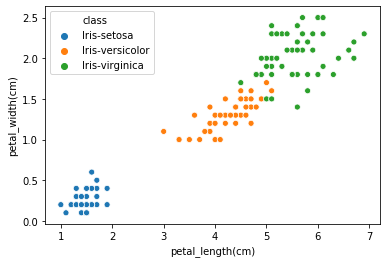

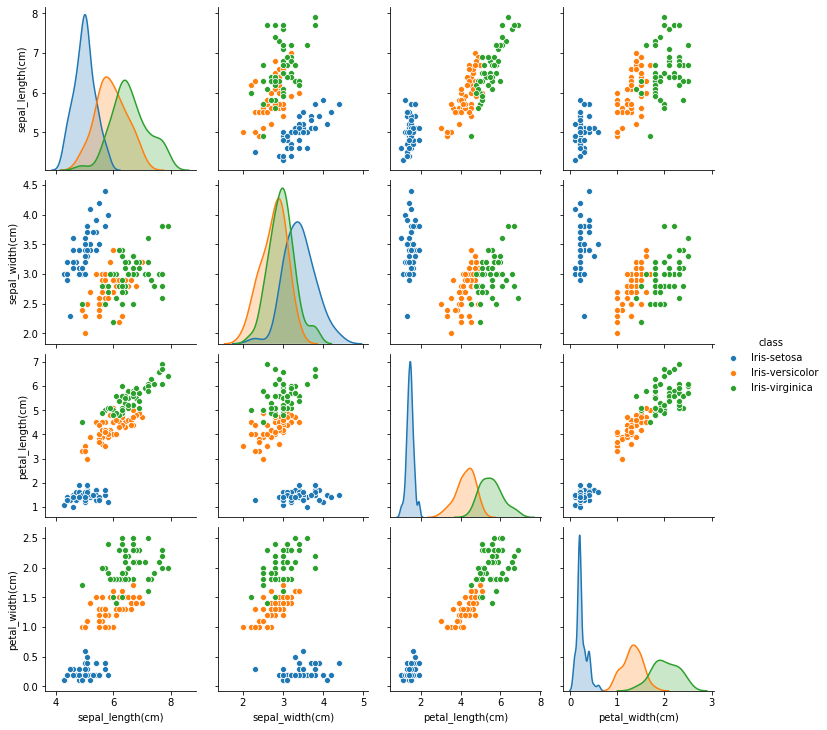

In [5]:
# Plot a scatter plot petal width vs petal length
sns.scatterplot(x='petal_length(cm)',y='petal_width(cm)',hue='class',data=data)
plt.show()
sns.pairplot(data=data,hue='class')
plt.show()

## 3. Build the model

Before we build our model, we have to split our data into training and test sets. To do this we are going to use train_test_split method from sci-kit

In [6]:
# Initialize the Label Encoder
le = LabelEncoder()

# Extract the features and target
features = data.iloc[:,0:4]
target_encoded = le.fit_transform(data['class'].astype('category'))

# Split the data info training and test sets
X_train, X_test, y_train, y_test = train_test_split(features,target_encoded,test_size=0.3,random_state=34,stratify=target_encoded)

Now we can initialize our model and fit it. We are going to use GridSearchCV for hyperparameter tuning

In [44]:
parameters = {'max_depth':[5,7,10,12,15],'criterion':['entropy','gini'],'random_state':[34],'min_samples_leaf':range(1,10),'min_samples_split':range(2,10)}

# Initialize the classifier
dt = DecisionTreeClassifier()

# Initialize the GridSearchCV
clf = GridSearchCV(estimator=dt,param_grid=parameters,cv=10)

# Fit the grid search
clf.fit(X_train, y_train)

# Print the best parameters and the best accuracy
print("Best parameters:",clf.best_params_)
print("Best accuracy:",clf.best_score_)

# Fit the model with training set
dt_best = clf.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 34}
Best accuracy: 0.9618181818181817


We've trained our model. Let's calculate the accuracy

Accuracy:  0.9555555555555556


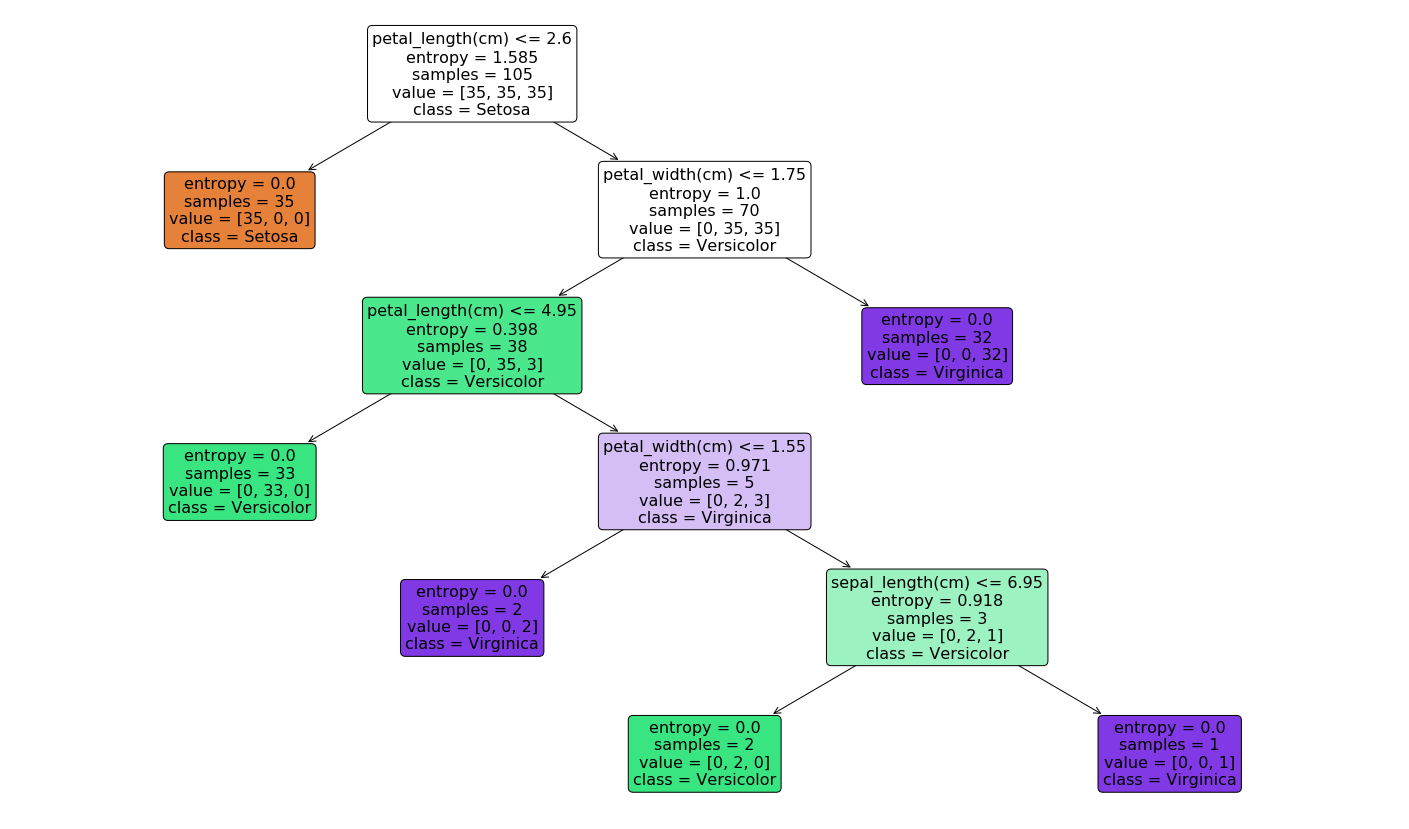

In [45]:
# Visualize our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(dt_best, 
              feature_names=X_train.columns, 
              class_names=['Setosa','Versicolor','Virginica'], 
              rounded=True,
              filled=True,
              label='all',
              fontsize=16)

# Predict from the test set
y_pred = dt_best.predict(X_test)

# Print the accuracy with accuracy_score function
print("Accuracy: ", accuracy_score(y_test, y_pred))

## 4. Make Predictions
Our model is ready to predict!
Input features of an observation to see what happens.

In [46]:
i = list(map(float,input("Enter the sepal length, sepal width, petal length and pedal width seperated by space.").split()))
new_observation = pd.DataFrame({'sl':i[0],'sw':i[1],'pl':i[2],'pw':i[3]},index= [0])
if dt_best.predict(new_observation)[0]==0 :
    prediction = "Setosa"
elif dt_best.predict(new_observation)[0]==1:
    prediction = "Versicolor"
else:
    prediction = "Virginica"
print("Its belongs to {} class".format(prediction))


Enter the sepal length, sepal width, petal length and pedal width seperated by space.1.2 3.4 3.7 6
Its belongs to Virginica class


That's the end of this notebook. I hope it is helpful for understanding Decision Tree for classification